## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 16
---------------------------------------

GOALS:

1. Work to understand when a linear model vs. non-linear model is a good choice.
2. Practice plotting residuals and regression lines.
3. Do an analysis using non-linear regression.


----------------------------------------------------------

This homework has **2 Questions** and **3 Exercises**

## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


## Announcements

**Come to Lab!** If you need help we are here to help!

## Day 16 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day16 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day16-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

## Paris Paintings Data - Load the data

To explore the ideas of modeling data we will use the Paris Paintings dataset.

- Source: Printed catalogs of 28 auction sales in Paris, 1764 - 1780 (Historical Data)
- Data curators Sandra van Ginhoven and Hilary Coe Cronheim (who were PhD students in the Duke Art, Law, and Markets Initiative at the time of putting together this dataset) translated and tabulated the catalogs
-  3393 paintings, their prices, and descriptive details from sales catalogs over 60 variables

[Variables in Paris Paintings Data](https://www2.stat.duke.edu/~cr173/Sta112_Fa16/data/paris_paintings.html)

This lab follows the Data Science in a Box units "Unit 4 - Deck 3: Modeling nonlinear relationships " by Mine Çetinkaya-Rundel. It has been updated for our class and translated to Python by Joanna Bieri.

In [5]:
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [6]:
show(DF_raw_paintings)

In [7]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

## Explore Linearity

Fit a model for Price as a function of size. Let's redo that analysis except this time focus only on paintings with area of less than 10,000 inches squared.

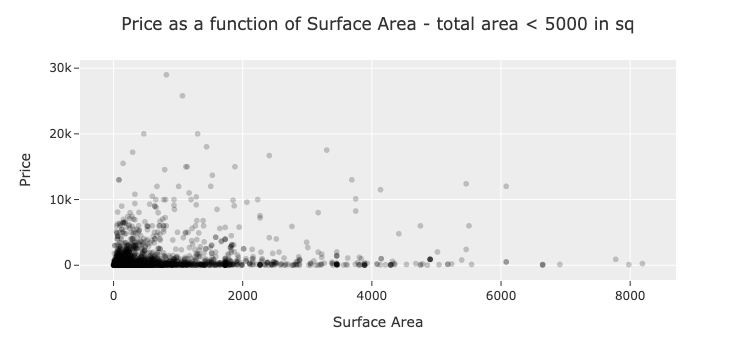

Model Score:
0.014875957473786783


In [9]:
#| code-fold: true
#| code-summary: "Answer to Exercise 2 Day 15 for paintings < 10000 in^2"

# Get the columns I care about
my_columns = ['Surface','price']
DF_model2 = DF[my_columns]

# Do some preprocessing - drop NA and make the Surface variable a float
DF_model2.dropna(inplace=True)
DF_model2['Surface'] = DF_model2['Surface'].apply(lambda x: float(x))

# Mask the data for surface area less than 10,000
mask = DF_model2['Surface'] <= 10_000
DF_model2 = DF_model2[mask]

# Make a Scatter plot
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Price as a function of Surface Area - total area < 5000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='Price')


fig.show()

# Create the X and y variables for Linear Regression
X = DF_model2['Surface'].values.reshape(-1,1)
y = DF_model2['price'].values

# Create linear regression object - a random straight line
LM = LinearRegression()
# Train the model using the data
LM.fit(X, y)

# The score from my model
print('Model Score:')
print(LM.score(X,y))

**Exercise 1** Create a Residual plot for the model above.

1. Get the predictions - store these in a column in the data frame

```{python}
LM.predict(X)
```

2. Calculate the residuals - store these in a column in the data frame
```{python}
'Residual' = 'Real Value in the Data' - 'Value Predicted by LM'
```

3. Plot the result
```{python}
px.scatter(df,x='Value Predicted by LM',y='Residual')
```


See if you can recreate the plot shown in the lecture.

In [11]:
DF_model2['price_predicted'] = LM.predict(X) 
DF_model2['Residual'] = DF_model2['price'] - DF_model2['price_predicted']
DF_model2

Surface  price  price_predicted    Residual
0      1091.5  360.0       904.234443 -544.234443
1       252.0    6.0       683.985984 -677.985984
2       208.0   12.0       672.442289 -660.442289
3       252.0    6.0       683.985984 -677.985984
4       252.0    6.0       683.985984 -677.985984
...       ...    ...              ...         ...
3388    387.0   18.0       719.404140 -701.404140
3389    214.5   25.0       674.147607 -649.147607
3390    720.0   80.0       806.768925 -726.768925
3391    621.0    5.0       780.795610 -775.795610
3392    621.0    5.0       780.795610 -775.795610

[3211 rows x 4 columns]

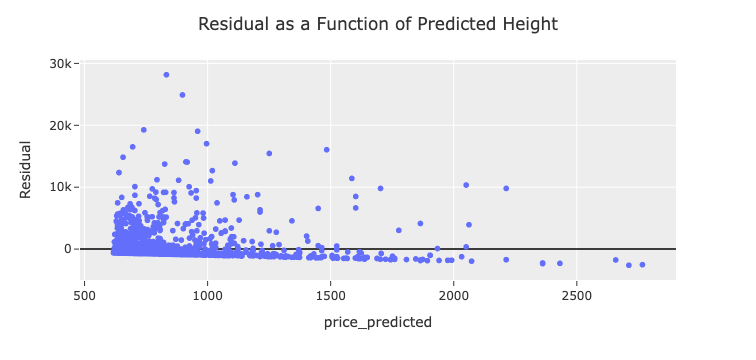

In [12]:
fig = px.scatter(DF_model2,x='price_predicted',y='Residual')

# Update layout to show axis line at y=0
fig.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"}
)

fig.update_layout(template="ggplot2",
                  title='Residual as a Function of Predicted Height',
                  title_x=0.5
                 )

fig.show()

**Q1** What do you see here? Does this residual data seem uniformly distributed?


The graph in the data displays that the lower the price is predicted the more the residual is. Many of the residual points lie within the range of 500- 1000 dollars.  The greater the residual becomes, more values begin to become negative. 

## From Lecture - Consider the skew in the data

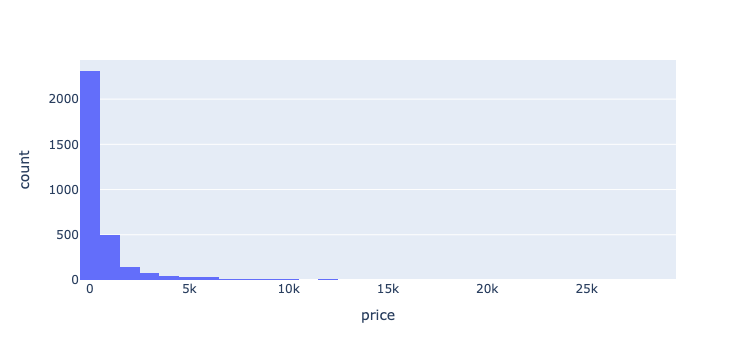

In [16]:
# Plot a histogram - notice that it is very skewed
fig = px.histogram(DF_model2,x='price',nbins =30)
fig.show()

In [17]:
# Us numpy to take the natural log of the data - removing the exponential decay
DF_model2['log_price'] = np.log(DF_model2['price'])

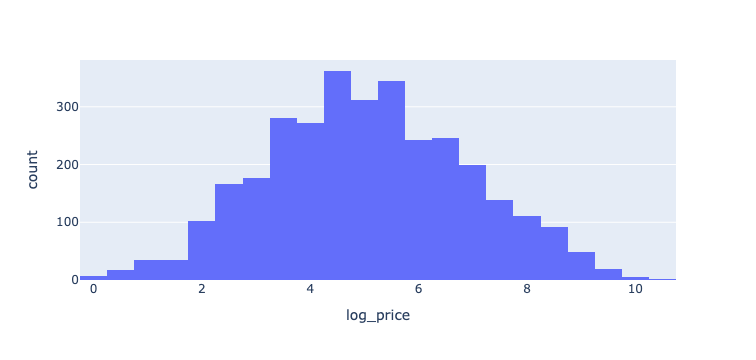

In [18]:
# Plot a histogram of the log(price) - notice we have removed the skew
fig = px.histogram(DF_model2,x='log_price',nbins =30)

fig.show()

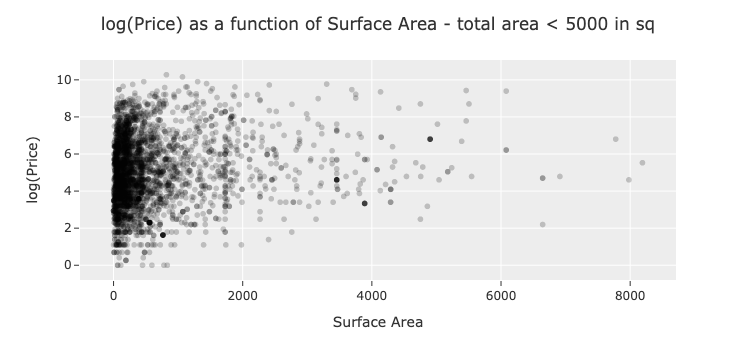

In [19]:
# Look at the scatter plot of the log(price)
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='log_price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='log(Price) as a function of Surface Area - total area < 5000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='log(Price)')


fig.show()

**Q2** What is different about the histogram and the scatter plots after taking the natural log?

The histograms give a more uniform distrubution of the data. It allows the reader to examine a pattern over time and which periods in these times preformed the strongest. The scatter plot is more dispersed and is not linear. Many of the points on the scatter plot are located on the left and become more scattered as the surface area increases.

**Exercise 2:** Redo 
the linear regression analysis except this time use the log_price.

- Find the linear regression model (LM)
- Calculate the residual
- Plot the Residual as a function of the predicted log price
- Plot a scatter plot of the data with the linear regression line added.

*HINT* You can see my results in the lecture no/tes!

In [23]:
columns = ['Surface', 'log_price']
DF_model3 = DF_model2[columns]

In [24]:
# Check out the NaNs

# How many Nans
print('Number of NaNs:')
print(DF_model3.isna().sum().sum())
print('----------------------')

# What percent of the data is this?
print('Percent NaNs:')
print(DF_model3.isna().sum().sum()/len(DF))
print('----------------------')

# I am going to drop these! This is a choice!
DF_model3.dropna(inplace=True)
print('Number of NaNs after drop:')
print(DF_model3.isna().sum().sum())
print('----------------------')

Number of NaNs:
0
----------------------
Percent NaNs:
0.0
----------------------
Number of NaNs after drop:
0
----------------------


In [25]:
X = DF_model3['Surface'].values.reshape(-1, 1)
y = DF_model3['log_price'].values

In [26]:
LM = LinearRegression()

LM.fit(X, y)

LinearRegression()

In [27]:
LM.coef_

array([0.0002376])

In [28]:
LM.intercept_

4.911544880415433

In [29]:
DF_model3 ['log_price_predicted'] = LM.predict(X) 
DF_model3['Residual'] = DF_model3['log_price'] - DF_model3['log_price_predicted']
DF_model3 

Surface  log_price  log_price_predicted  Residual
0      1091.5   5.886104             5.170882  0.715222
1       252.0   1.791759             4.971419 -3.179660
2       208.0   2.484907             4.960965 -2.476058
3       252.0   1.791759             4.971419 -3.179660
4       252.0   1.791759             4.971419 -3.179660
...       ...        ...                  ...       ...
3388    387.0   2.890372             5.003495 -2.113123
3389    214.5   3.218876             4.962509 -1.743634
3390    720.0   4.382027             5.082615 -0.700588
3391    621.0   1.609438             5.059093 -3.449655
3392    621.0   1.609438             5.059093 -3.449655

[3211 rows x 4 columns]

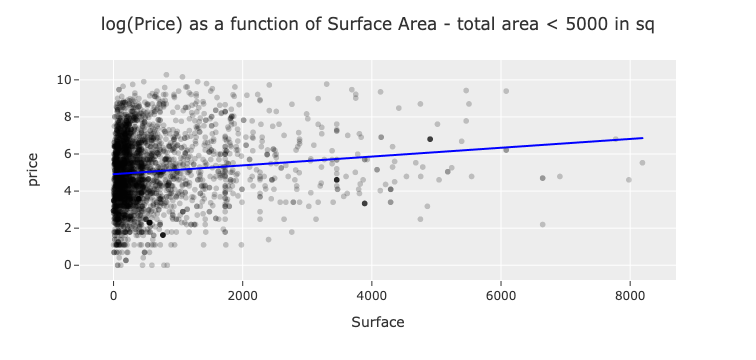

In [30]:
fig = px.scatter(DF_model3,
                 x='Surface',
                 y="log_price",
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='log(Price) as a function of Surface Area - total area < 5000 in sq',
                  title_x=0.5,
                  xaxis_title="Surface",
                  yaxis_title="price")

# Add the line our model would predict
DF_Model3 = pd.DataFrame()
DF_Model3['w'] = DF_model3['Surface']
DF_Model3['y'] = LM.coef_*DF_Model3['w']+LM.intercept_
DF_Model3 = DF_Model3.sort_values('w')

fig.add_trace(
    px.line(DF_Model3, x='w', y='y',color_discrete_sequence=['blue']).data[0]
)

fig.show()

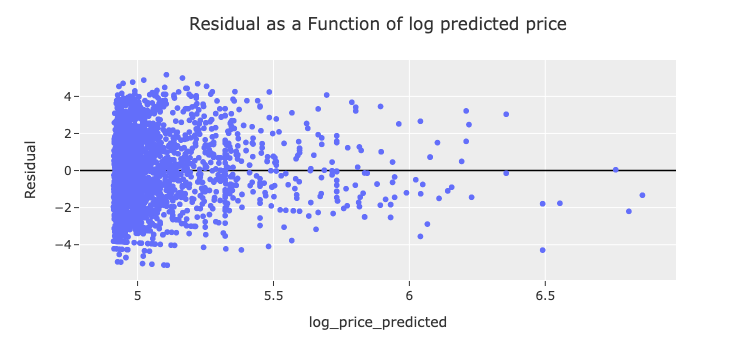

In [31]:
fig = px.scatter(DF_model3,x='log_price_predicted',y='Residual')

# Update layout to show axis line at y=0
fig.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"}
)

fig.update_layout(template="ggplot2",
                  title='Residual as a Function of log predicted price',
                  title_x=0.5
                 )

fig.show()

### 8What did we learn...

What is the model telling me?

$$ \hat{\log(price)} = 4.912 + 0.00024(Surface Area)$$

so we can calculate (see the lecture for details!)

$$ (SA+1) \sim 1.0002400288023041 * SA$$

This tells us that increase the area of the painting by one square inch increases the price by a factor of 1.0002400288023041 or about 0.024%.

There is a small positive increase in the price as the surface area increases, on average. 

Can we predict the price using the surface area? Look at LM.score(X,y)...

It does not appear that our logistic regression is a good predictor of the price. Even though it looks like we captured a good linear relationship, we do not have a good predictor. The scatter is still very large!

BUT - we are still able to see a linear trend in the model. There is a relationship here even though the data is very noisy!

**Exercise 3** Redo the full analysis except this time try using just height to predict price.

- Do a standard linear regression of the height vs. the price (without log) discuss the results. This should include a plot of the residuals and a plot showing the linear fit. You should also talk about what the score, intercept and coefficient of the model are telling you. EG. As the height increases by 1in the price.....
- Do a linear regression of the height vs. log_price and discuss the results. This should include a plot of the residuals and a plot showing the linear fit. You should also talk about what the score, intercept and coefficient of the model are telling you. EG. As the height increases by 1in the price..... Remember in this case you have to use the rules of logs and exponents to interpret the results.

Which of these models do you think is doing a better job of capturing the functional relationships in the price vs height data? Why?

In [35]:
columns = ['Height_in','price']
DF_model_4 = DF[columns]

In [36]:
DF_model_4.dtypes

Height_in     object
price        float64
dtype: object

In [37]:
DF_model_4['Height_in'] = DF_model_4['Height_in'].apply(lambda x: float(x))

In [38]:
DF_model_4.dtypes

Height_in    float64
price        float64
dtype: object

In [39]:
# Check out the NaNs

# How many Nans
print('Number of NaNs:')
print(DF_model_4.isna().sum().sum())
print('----------------------')

# What percent of the data is this?
print('Percent NaNs:')
print(DF_model_4.isna().sum().sum()/len(DF))
print('----------------------')

# I am going to drop these! This is a choice!
DF_model_4.dropna(inplace=True)
print('Number of NaNs after drop:')
print(DF_model_4.isna().sum().sum())
print('----------------------')

Number of NaNs:
252
----------------------
Percent NaNs:
0.07427055702917772
----------------------
Number of NaNs after drop:
0
----------------------


In [40]:
X = DF_model_4['Height_in'].values.reshape(-1, 1)
y = DF_model_4['price'].values

In [41]:

LM = LinearRegression()

LM.fit(X, y)

LinearRegression()

In [42]:
LM.coef_

array([15.07549869])

In [43]:
LM.intercept_

485.3546427150759

In [68]:
LM.score(X,y)

0.01276057594959179

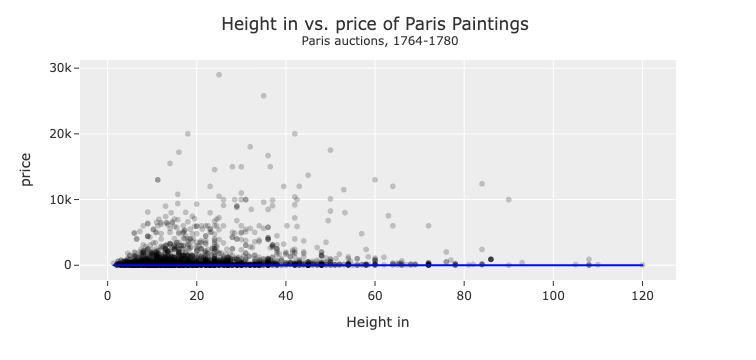

In [97]:
fig = px.scatter(DF_model_4,
                 x='Height_in',
                 y="price",
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Height in vs. price of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Height in",
                  yaxis_title="price")

# Add the line our model would predict
DF_Model_4 = pd.DataFrame()
DF_Model_4['w'] = DF_model_4['Height_in']
DF_Model_4['y'] = LM.coef_*DF_Model_4['w']+LM.intercept_
DF_Model_4 = DF_Model_4.sort_values('w')

fig.add_trace(
    px.line(DF_Model_4, x='w', y='y',color_discrete_sequence=['blue']).data[0]
)

fig.show()

The paintings within this graph stay between the ranges of 1 inch to 64 inches. Many of the paintings do not exceed the price of 10,000 dollars but stay right under it. The score of the graph is close to 0 at a value of .012 meaning theres no linear relationship between the values. The intercept of 485.35 shows this price at zero inches. The coefficient represents an increase in price of $15.07 for an inch. 

In [71]:
DF_model_4['price_predicted'] = LM.predict(X) 
DF_model_4['Residual'] = DF_model_4['price'] - DF_model_4['price_predicted']
DF_model_4 

Height_in  price  price_predicted    Residual
0          37.0  360.0      1043.148094 -683.148094
1          18.0    6.0       756.713619 -750.713619
2          13.0   12.0       681.336126 -669.336126
3          14.0    6.0       696.411624 -690.411624
4          14.0    6.0       696.411624 -690.411624
...         ...    ...              ...         ...
3388       18.0   18.0       756.713619 -738.713619
3389       13.0   25.0       681.336126 -656.336126
3390       24.0   80.0       847.166611 -767.166611
3391       27.0    5.0       892.393107 -887.393107
3392       27.0    5.0       892.393107 -887.393107

[3141 rows x 4 columns]

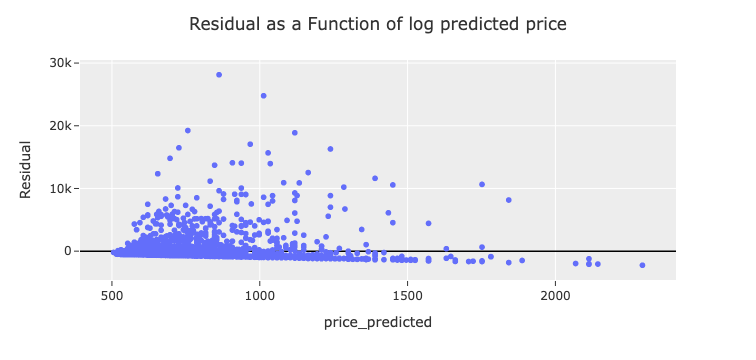

In [73]:
fig = px.scatter(DF_model_4,x='price_predicted',y='Residual')

# Update layout to show axis line at y=0
fig.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"}
)

fig.update_layout(template="ggplot2",
                  title='Residual as a Function of log predicted price',
                  title_x=0.5
                 )

fig.show()

This graph is similar to the one above, at the price predicted becomes larger the residual lowers in value. There is a nonlinear relationship.

In [75]:
DF_model_4['log_price'] = np.log(DF_model_4['price'])  

In [77]:
new_columns = ['Height_in','log_price']
DF_model5 = DF_model_4[new_columns] 
DF_model5

Height_in  log_price
0          37.0   5.886104
1          18.0   1.791759
2          13.0   2.484907
3          14.0   1.791759
4          14.0   1.791759
...         ...        ...
3388       18.0   2.890372
3389       13.0   3.218876
3390       24.0   4.382027
3391       27.0   1.609438
3392       27.0   1.609438

[3141 rows x 2 columns]

In [79]:
X = DF_model5['Height_in'].values.reshape(-1, 1)
y = DF_model5['log_price'].values

In [81]:
LM = LinearRegression()

LM.fit(X, y)

LinearRegression()

In [83]:
LM.coef_

array([0.01036213])

In [85]:
LM.intercept_

4.868389335057933

In [87]:
LM.score(X,y)

0.006754700790331358

In [89]:
DF_model5['log_price_predicted'] = LM.predict(X) 
DF_model5['Residual'] = DF_model5['log_price'] - DF_model5['log_price_predicted']
DF_model5 

Height_in  log_price  log_price_predicted  Residual
0          37.0   5.886104             5.251788  0.634316
1          18.0   1.791759             5.054908 -3.263148
2          13.0   2.484907             5.003097 -2.518190
3          14.0   1.791759             5.013459 -3.221700
4          14.0   1.791759             5.013459 -3.221700
...         ...        ...                  ...       ...
3388       18.0   2.890372             5.054908 -2.164536
3389       13.0   3.218876             5.003097 -1.784221
3390       24.0   4.382027             5.117080 -0.735054
3391       27.0   1.609438             5.148167 -3.538729
3392       27.0   1.609438             5.148167 -3.538729

[3141 rows x 4 columns]

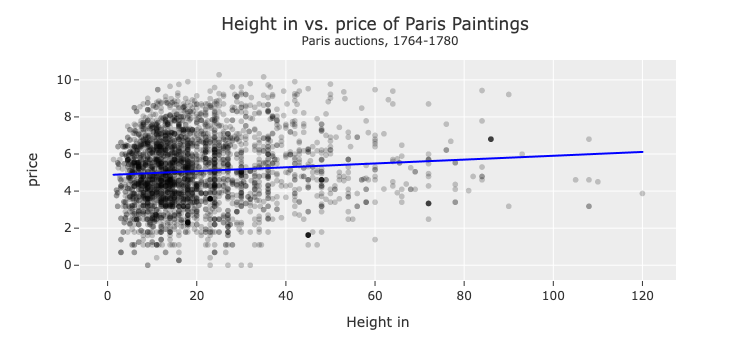

In [91]:
fig = px.scatter(DF_model5,
                 x='Height_in',
                 y="log_price",
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Height in vs. price of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Height in",
                  yaxis_title="price")

# Add the line our model would predict
DF_Model5 = pd.DataFrame()
DF_Model5['w'] = DF_model5['Height_in']
DF_Model5['y'] = LM.coef_*DF_Model5['w']+LM.intercept_
DF_Model5 = DF_Model5.sort_values('w')

fig.add_trace(
    px.line(DF_Model5, x='w', y='y',color_discrete_sequence=['blue']).data[0]
)

fig.show()

The score is .006 which means there is no linear regression between the points because they are so dispersed. The coefficient of .10 is converted to 1.01 using the equation e^b1. For every inch of height, the price will increase by 1.01 dollars. The intercept means when the height is at 0 inches the price is about 4.86 dollars. 

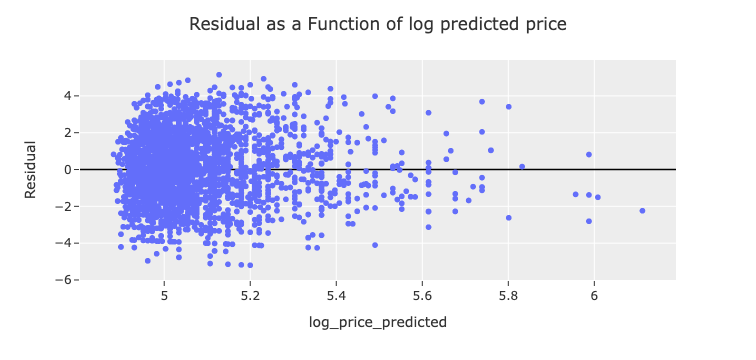

In [93]:
fig = px.scatter(DF_model5,x='log_price_predicted',y='Residual')

# Update layout to show axis line at y=0
fig.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"}
)

fig.update_layout(template="ggplot2",
                  title='Residual as a Function of log predicted price',
                  title_x=0.5
                 )

fig.show()

Points are gathered aroud zero in terms of the residual. The points are very randomly distributed throughout the graph. Many of the points are clustered aroud -4 to  2 on the residual and 5 on the predicted log price. 